## **Importação das bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

## **Leitura e visualização dos dados**

In [3]:
brasileirao = pd.read_csv('./dados/Brasileirao_Matches.csv', sep=',', encoding='utf-8')
brasileirao.head()

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,SP,Atletico-MG,MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,SP,Fluminense-RJ,RJ,0.0,1.0,2012,1


## **Organização e Tratamento dos dados**

In [4]:
brasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         4120 non-null   object 
 1   home_team        4170 non-null   object 
 2   home_team_state  4170 non-null   object 
 3   away_team        4170 non-null   object 
 4   away_team_state  4170 non-null   object 
 5   home_goal        4059 non-null   float64
 6   away_goal        4059 non-null   float64
 7   season           4170 non-null   int64  
 8   round            4170 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 293.3+ KB


### **Exclusão das colunas desnecessárias**

In [5]:
# Colunas do estado dos times são desnecessárias, pois os mesmos já estão inclusos nos nomes dos times.
brasileirao.drop(columns=['home_team_state', 'away_team_state'], inplace=True)

### **Exclusão dos registros da temporada de 2022**

--> A temporada de 2022 está incompleta no dataset, portanto não será utilizada nas análises.

In [6]:
# Armazena em uma lista todos os índices dos registros que contém dados da temporada 2022
indices_2022 = brasileirao.loc[brasileirao['season'] == 2022].index

# Remove todos os registros da temporada 2022 utilizando os índices
brasileirao = brasileirao.drop(brasileirao.index[min(indices_2022)-1:max(indices_2022)+1])

### **Renomeação das colunas**

In [7]:
brasileirao.rename(columns={'datetime': 'data_jogo', 
                            'home_team':'time_casa', 
                            'away_team':'time_fora', 
                            'home_goal':'gols_casa',
                            'away_goal': 'gols_fora',
                            'season': 'temporada',
                            'round': 'rodada'}, inplace=True)

### **Tratamento dos Valores Missing (NaN)**

In [8]:
# Contagem dos valores NaN
brasileirao.isna().sum()

data_jogo    0
time_casa    0
time_fora    0
gols_casa    1
gols_fora    1
temporada    0
rodada       0
dtype: int64

In [9]:
brasileirao.loc[brasileirao['gols_casa'].isna()]

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,rodada
1897,2016-12-11 17:00:00,Chapecoense-SC,Atletico-MG,NaN,NaN,2016,38


In [10]:
# Essa partida não aconteceu, portanto os valores nulos serão substituídos por 99 (somente para as primeiras análises), 
# depois os registros nulos serão excluidos.
brasileirao.fillna(99, inplace=True)

### **Tratamento da tipagem dos dados**

In [11]:
brasileirao.dtypes

data_jogo     object
time_casa     object
time_fora     object
gols_casa    float64
gols_fora    float64
temporada      int64
rodada         int64
dtype: object

In [12]:
brasileirao['data_jogo'] = pd.to_datetime(brasileirao['data_jogo'])
brasileirao['gols_casa'] = brasileirao['gols_casa'].astype(np.int64)
brasileirao['gols_fora'] = brasileirao['gols_fora'].astype(np.int64)

brasileirao.dtypes

data_jogo    datetime64[ns]
time_casa            object
time_fora            object
gols_casa             int64
gols_fora             int64
temporada             int64
rodada                int64
dtype: object

### **Adição de colunas**

In [13]:
# Adiciona a coluna que apresenta o placar de cada jogo
brasileirao['placar'] = brasileirao['gols_casa'].astype(str) + '-' + brasileirao['gols_fora'].astype(str) 

In [14]:
# Armazena os gols da casa e do visitante em listas
gols_casa = [int(gols) for gols in brasileirao['gols_casa']]
gols_visitante = [int(gols) for gols in brasileirao['gols_fora']]

# Une os valores de gols_casa e gols_visitante de acordo com o índice
# de cada lista
placares = zip(gols_casa, gols_visitante)

# Lista vazia para armazenar os resultados
resultados = []

for placar in placares:
    # Se o time da casa fez mais gols que o visitante
    if placar[0] > placar[1]:
       resultados.append('Vitória Casa')
    # Se os dois times fizeram a mesma quantidade de gols
    elif placar[0] == placar[1]:
       resultados.append('Empate')
    # Se o time visitante fez mais gols que o time da casa
    else:
       resultados.append('Vitória Fora')

# Adiciona a coluna que apresenta o resultado de cada jogo
brasileirao['resultado'] = resultados

In [15]:
brasileirao.head()

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,rodada,placar,resultado
0,2012-05-19 18:30:00,Palmeiras-SP,Portuguesa-SP,1,1,2012,1,1-1,Empate
1,2012-05-19 18:30:00,Sport-PE,Flamengo-RJ,1,1,2012,1,1-1,Empate
2,2012-05-19 21:00:00,Figueirense-SC,Nautico-PE,2,1,2012,1,2-1,Vitória Casa
3,2012-05-20 16:00:00,Ponte Preta-SP,Atletico-MG,0,1,2012,1,0-1,Vitória Fora
4,2012-05-20 16:00:00,Corinthians-SP,Fluminense-RJ,0,1,2012,1,0-1,Vitória Fora


### **Reordenação de colunas**

In [16]:
# Remove as colunas e armazena em uma variável em forma de Série
temporadas = brasileirao.pop('temporada')
rodadas = brasileirao.pop('rodada')

# Insere as no DataFrame no índice desejado
brasileirao.insert(0, 'temporada', temporadas)
brasileirao.insert(2, 'rodada', rodadas)

brasileirao.head()

,temporada,data_jogo,rodada,time_casa,time_fora,gols_casa,gols_fora,placar,resultado
0,2012,2012-05-19 18:30:00,1,Palmeiras-SP,Portuguesa-SP,1,1,1-1,Empate
1,2012,2012-05-19 18:30:00,1,Sport-PE,Flamengo-RJ,1,1,1-1,Empate
2,2012,2012-05-19 21:00:00,1,Figueirense-SC,Nautico-PE,2,1,2-1,Vitória Casa
3,2012,2012-05-20 16:00:00,1,Ponte Preta-SP,Atletico-MG,0,1,0-1,Vitória Fora
4,2012,2012-05-20 16:00:00,1,Corinthians-SP,Fluminense-RJ,0,1,0-1,Vitória Fora


## **Legenda**


**temporada**: Ano/temporada do campeonato em disputa

**data_jogo**: Data e horário em que o jogo foi realizado

**rodada**: Rodada do campeonato em disputa
   
**time_casa**: Time que jogou como mandante 

**time_fora**: time que jogou como visitante

**gols_casa**: Gols do time mandante no jogo inteiro (=99 caso seja nulo)

**gols_fora**: Gols do time visitante no jogo inteiro (=99 caso seja nulo)

**placar**: Placar final do jogo disputado (='99-99' caso seja nulo)
   
**resultado**: Resultado final do jogo disputado


## **EXPLORAÇÃO**

### **Todos os times que participaram das edições de 2012 até 2021**

In [17]:
# Armazena na variável o nome de todos os times sem repetições
times = sorted(brasileirao['time_casa'].unique())

In [18]:
print(f'{len(times)} times disputaram o Brasileirão entre as temporadas de 2012 e 2021;')
print('\nOs times que participaram foram:\n')

for i, time in enumerate(times):
    print(f'{i+1}- {time}')

36 times disputaram o Brasileirão entre as temporadas de 2012 e 2021;

Os times que participaram foram:

1- America-MG
2- Atletico-GO
3- Atletico-MG
4- Atletico-PR
5- Avai-SC
6- Bahia-BA
7- Botafogo-RJ
8- Ceara-CE
9- Chapecoense-SC
10- Corinthians-SP
11- Coritiba-PR
12- Criciuma-SC
13- Cruzeiro-MG
14- Csa-AL
15- Cuiaba-MT
16- Figueirense-SC
17- Flamengo-RJ
18- Fluminense-RJ
19- Fortaleza-CE
20- Goias-GO
21- Gremio-RS
22- Internacional-RS
23- Joinville-SC
24- Juventude-RS
25- Nautico-PE
26- Palmeiras-SP
27- Parana-PR
28- Ponte Preta-SP
29- Portuguesa-SP
30- Red Bull Bragantino-SP
31- Santa Cruz-PE
32- Santos-SP
33- Sao Paulo-SP
34- Sport-PE
35- Vasco da Gama-RJ
36- Vitoria-BA


### **Times que estiveram presentes em todas as 10 temporadas**

In [19]:
# Conta a quantidade de jogos que cada time teve jogando em casa
times_jogos_casa = brasileirao['time_casa'].value_counts()

In [20]:
# Como cada temporada tem 38 jogos, sendo 19 como mandante e 19 como visitante, então o time que jogar 10 temporadas
# terá jogado 190 partidas dentro de casa e 190 fora.
times_unanimes = times_jogos_casa.loc[times_jogos_casa == 190].index.to_list()

In [21]:
print(f'{len(times_unanimes)} times disputaram todas as temporadas entre 2012 e 2021;')
print(f'\nEsses times são:\n')

for i, time in enumerate(sorted(times_unanimes)):
    print(f'{i+1}- {time}')

7 times disputaram todas as temporadas entre 2012 e 2021;

Esses times são:

1- Atletico-MG
2- Corinthians-SP
3- Flamengo-RJ
4- Fluminense-RJ
5- Gremio-RS
6- Santos-SP
7- Sao Paulo-SP


### **Times disputaram apenas 1 temporada**

In [22]:
# Como cada temporada tem 38 jogos, sendo 19 como mandante e 19 como visitante, então o time que jogou 1 temporada 
# terá jogado 19 partidas dentro de casa e 19 fora.
times_menos_temporadas = times_jogos_casa.loc[times_jogos_casa == 19].index.to_list()

print(f'{len(times_menos_temporadas)} times disputaram apenas 1 temporada entre 2012 e 2021;')
print(f'\nEsses times são:\n')

for i, time in enumerate(sorted(times_menos_temporadas)):
    print(f'{i+1}- {time}')

6 times disputaram apenas 1 temporada entre 2012 e 2021;

Esses times são:

1- Csa-AL
2- Cuiaba-MT
3- Joinville-SC
4- Juventude-RS
5- Parana-PR
6- Santa Cruz-PE


### **Percentuais de vitórias e empates**

In [23]:
# Remove o jogo que possui valor nulo (99x99 no placar) para não interferir na análise, pois não se sabe o resultado do jogo.
placar_99 = brasileirao.loc[brasileirao['gols_casa'] == 99].index[0]
brasileirao.drop(brasileirao.index[[placar_99]], inplace=True)

# Reordena os índices
brasileirao.reset_index(drop=True, inplace=True)

In [24]:
# Armazena na variável a quantidade de vitória casa, vitória fora e empate, ambos no formato de porcentagem
percentual_resultados = brasileirao['resultado'].value_counts(normalize=True) * 100

print(f'Percentuais dos resultados dos times:\n')
print(f'Vitória do mandante: {percentual_resultados[0]:.2f}%')
print(f'Vitória do visitante: {percentual_resultados[1]:.2f}%')
print(f'Empate: {percentual_resultados[2]:.2f}%')

Percentuais dos resultados dos times:

Vitória do mandante: 49.05%
Vitória do visitante: 26.91%
Empate: 24.04%


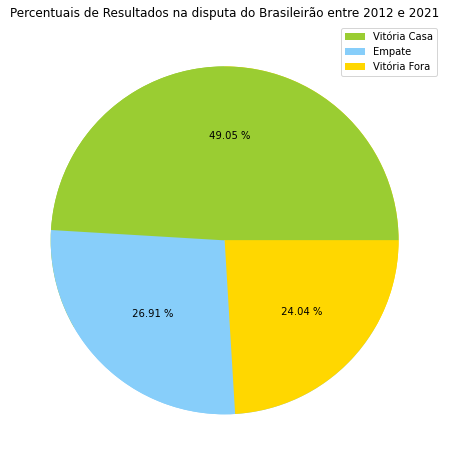

In [25]:
plt.figure(figsize=(8,8))

sizes=[0.7,0.7,0.7]
colors = ['yellowgreen', 'lightskyblue', 'gold']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, percentual_resultados.index, loc="best")

plt.pie(percentual_resultados.values, autopct= '% .2f %%', colors=colors)
plt.title('Percentuais de Resultados na disputa do Brasileirão entre 2012 e 2021')

plt.show()

## **Criação de um novo DataFrame utilizando dados do existente**

In [26]:
brasileirao_times = pd.DataFrame()

### **Total de jogos de cada time**

In [27]:
# Armazena na variável o número total de jogos de cada time
total_jogos_times = brasileirao['time_casa'].value_counts() + brasileirao['time_fora'].value_counts()

### **Total de vitórias, derrotas e empates em casa de cada time**

In [28]:
# Armazena nas variáveis o total de vitórias, derrotas e empates, respectivamente, de cada time jogando em casa
# Foi criada uma série com o valor 0 atribuído a todos os times para não prejudicar nas análises,
# pois poderia acontecer de algum time não ganhar nenhum jogo em casa, por exemplo, e ficar de fora da série final
total_vitorias_casa = pd.Series([0] * len(times), index=times)
total_vitorias_casa += brasileirao.loc[brasileirao['resultado'] == 'Vitória Casa']['time_casa'].value_counts()
total_vitorias_casa = total_vitorias_casa.fillna(0).astype(np.int64)

total_derrotas_casa = pd.Series([0] * len(times), index=times)
total_derrotas_casa += brasileirao.loc[brasileirao['resultado'] == 'Vitória Fora']['time_casa'].value_counts()
total_derrotas_casa = total_derrotas_casa.fillna(0).astype(np.int64)

total_empates_casa = pd.Series([0] * len(times), index=times)
total_empates_casa += brasileirao.loc[brasileirao['resultado'] == 'Empate']['time_casa'].value_counts()
total_empates_casa = total_empates_casa.fillna(0).astype(np.int64)

# Armazena nas variáveis o total de gols de cada time jogando em casa
total_gols_marcados_casa = brasileirao.groupby(brasileirao['time_casa'])['gols_casa'].sum()
total_gols_sofridos_casa = brasileirao.groupby(brasileirao['time_casa'])['gols_fora'].sum()

### **Total de vitórias, derrotas e empates jogando fora de cada time**

In [29]:
# Armazena nas variáveis o total de vitórias, derrotas e empates, respectivamente, de cada time jogando fora
total_vitorias_fora = pd.Series([0] * len(times), index=times)
total_vitorias_fora += brasileirao.loc[brasileirao['resultado'] == 'Vitória Fora']['time_fora'].value_counts()
total_vitorias_fora = total_vitorias_fora.fillna(0).astype(np.int64)

total_derrotas_fora = pd.Series([0] * len(times), index=times)
total_derrotas_fora += brasileirao.loc[brasileirao['resultado'] == 'Vitória Casa']['time_fora'].value_counts()
total_derrotas_fora = total_derrotas_fora.fillna(0).astype(np.int64)

total_empates_fora = pd.Series([0] * len(times), index=times)
total_empates_fora += brasileirao.loc[brasileirao['resultado'] == 'Empate']['time_fora'].value_counts()
total_empates_fora = total_empates_fora.fillna(0).astype(np.int64)

# Armazena nas variáveis o total de gols de cada time jogando em casa
total_gols_marcados_fora = brasileirao.groupby(brasileirao['time_fora'])['gols_fora'].sum()
total_gols_sofridos_fora = brasileirao.groupby(brasileirao['time_fora'])['gols_casa'].sum()

### **Total de gols acumulados de cada time**

In [30]:
# Total de gols acumulados de cada time durante todas as temporadas
total_gols_marcados = total_gols_marcados_casa + total_gols_marcados_fora
total_gols_sofridos = total_gols_sofridos_casa + total_gols_sofridos_fora

### **Total de pontos acumulados de cada time**

In [31]:
# Total de pontos acumulados de cada time durante todas as temporadas
total_pontos_times = (total_vitorias_casa * 3) + (total_vitorias_fora * 3) + total_empates_casa + total_empates_fora

### **Aproveitamento de cada time**

--> Aproveitamento é o resultado da divisão da quantidade de pontos adquiridos pela quantidade de pontos possíveis para aquele time;

--> Multiplicado por 100 pois está representado em porcentagem.

In [32]:
# Aproveitamento final (em %) cada time após todas as temporadas
aproveitamento_final_times = total_pontos_times / (total_jogos_times * 3) * 100

### **Quantidade de temporadas disputadas por cada time**

--> Por conta da remoção de um registro, 2 times não ficaram com números de jogos uniformes

In [33]:
def temporadas_competidas(total_jogos_times):
    """Retorna a quantidade de temporadas disputadas pelo time de 
       acordo com a quantidade total de jogos disputados por ele."""
    temporadas_disputadas = 0
    
    if total_jogos_times <= 38 * 1:
        temporadas_disputadas += 1
    elif total_jogos_times <= 38 * 2:
        temporadas_disputadas += 2
    elif total_jogos_times <= 38 * 3:
        temporadas_disputadas += 3
    elif total_jogos_times <= 38 * 4:
        temporadas_disputadas += 4
    elif total_jogos_times <= 38 * 5:
        temporadas_disputadas += 5
    elif total_jogos_times <= 38 * 6:
        temporadas_disputadas += 6
    elif total_jogos_times <= 38 * 7:
        temporadas_disputadas += 7
    elif total_jogos_times <= 38 * 8:
        temporadas_disputadas += 8
    elif total_jogos_times <= 38 * 9:
        temporadas_disputadas += 9   
    else:
        temporadas_disputadas += 10
    
    return temporadas_disputadas

### **Adição dos dados no DataFrame**

In [34]:
# Cria as colunas do DataFrame
brasileirao_times['total_jogos'] = total_jogos_times
brasileirao_times['qtde_temporadas_disputadas'] = brasileirao_times.total_jogos.apply(lambda x: temporadas_competidas(x))
brasileirao_times['total_vitorias_casa'] = total_vitorias_casa
brasileirao_times['total_empates_casa'] = total_empates_casa
brasileirao_times['total_derrotas_casa'] = total_derrotas_casa
brasileirao_times['total_gols_marcados_casa'] = total_gols_marcados_casa
brasileirao_times['total_gols_sofridos_casa'] = total_gols_sofridos_casa
brasileirao_times['total_vitorias_fora'] = total_vitorias_fora
brasileirao_times['total_empates_fora'] = total_empates_fora
brasileirao_times['total_derrotas_fora'] = total_derrotas_fora
brasileirao_times['total_gols_marcados_fora'] = total_gols_marcados_fora
brasileirao_times['total_gols_sofridos_fora'] = total_gols_sofridos_fora
brasileirao_times['total_gols_marcados'] = total_gols_marcados
brasileirao_times['total_gols_sofridos'] = total_gols_sofridos
brasileirao_times['total_pontos'] = total_pontos_times
brasileirao_times['aproveitamento_final_%'] = round(aproveitamento_final_times, 2)

In [35]:
brasileirao_times.head()

,total_jogos,qtde_temporadas_disputadas,total_vitorias_casa,total_empates_casa,total_derrotas_casa,total_gols_marcados_casa,total_gols_sofridos_casa,total_vitorias_fora,total_empates_fora,total_derrotas_fora,total_gols_marcados_fora,total_gols_sofridos_fora,total_gols_marcados,total_gols_sofridos,total_pontos,aproveitamento_final_%
America-MG,114,3,24,16,17,57,48,6,15,36,37,94,94,142,121,35.38
Atletico-GO,151,4,20,27,28,78,88,20,19,37,68,116,146,204,166,36.64
Atletico-MG,379,10,125,35,30,355,173,55,60,74,219,257,574,430,635,55.85
Atletico-PR,342,9,98,39,34,262,136,42,39,90,156,228,418,364,498,48.54
Avai-SC,114,3,14,23,20,51,70,10,10,37,34,100,85,170,105,30.70


## **Gráficos baseados no novo DataFrame**

### **Temporadas disputadas**

In [36]:
br_times_temporadas = brasileirao_times['qtde_temporadas_disputadas'].sort_values(ascending=False)
br_times_temporadas

Corinthians-SP            10
Sao Paulo-SP              10
Flamengo-RJ               10
Gremio-RS                 10
Santos-SP                 10
Fluminense-RJ             10
Atletico-MG               10
Internacional-RS           9
Palmeiras-SP               9
Atletico-PR                9
Botafogo-RJ                8
Cruzeiro-MG                8
Bahia-BA                   8
Sport-PE                   8
Chapecoense-SC             7
Coritiba-PR                7
Vasco da Gama-RJ           7
Goias-GO                   5
Vitoria-BA                 5
Ponte Preta-SP             5
Atletico-GO                4
Figueirense-SC             4
Ceara-CE                   4
America-MG                 3
Avai-SC                    3
Fortaleza-CE               3
Nautico-PE                 2
Portuguesa-SP              2
Red Bull Bragantino-SP     2
Criciuma-SC                2
Juventude-RS               1
Parana-PR                  1
Joinville-SC               1
Santa Cruz-PE              1
Cuiaba-MT     

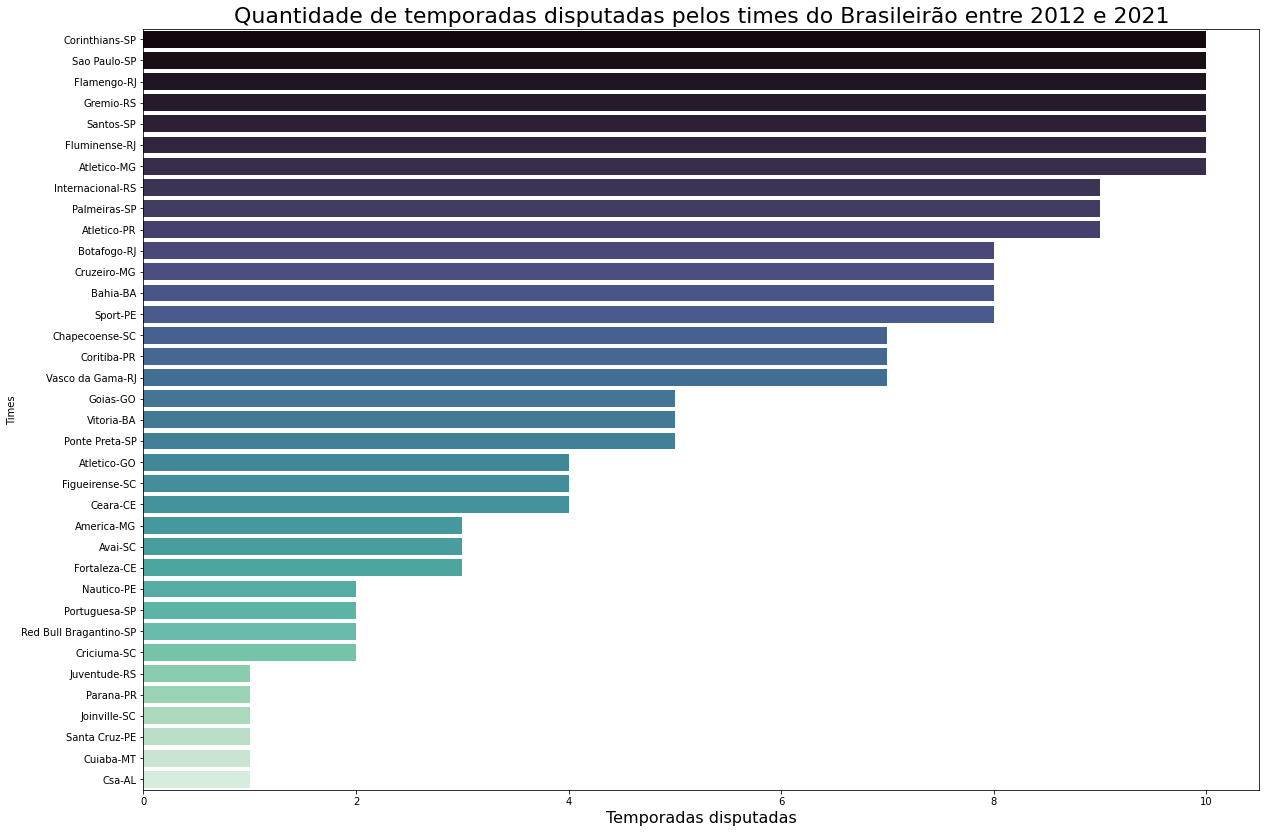

In [37]:
fig, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x=br_times_temporadas.values, y=br_times_temporadas.index, palette='mako')
ax.set_title('Quantidade de temporadas disputadas pelos times do Brasileirão entre 2012 e 2021', fontsize=22)
ax.set_xlabel('Temporadas disputadas', fontsize=16)
ax.set_ylabel('Times')
plt.show()

### **Pontos**

In [38]:
br_times_pts = brasileirao_times['total_pontos'].sort_values(ascending=False)
br_times_pts

Atletico-MG               635
Flamengo-RJ               631
Gremio-RS                 613
Corinthians-SP            592
Sao Paulo-SP              590
Santos-SP                 583
Palmeiras-SP              548
Fluminense-RJ             537
Internacional-RS          516
Atletico-PR               498
Cruzeiro-MG               460
Botafogo-RJ               383
Bahia-BA                  366
Sport-PE                  366
Vasco da Gama-RJ          332
Coritiba-PR               307
Chapecoense-SC            287
Goias-GO                  233
Ponte Preta-SP            228
Vitoria-BA                222
Ceara-CE                  185
Atletico-GO               166
Figueirense-SC            157
Fortaleza-CE              152
America-MG                121
Red Bull Bragantino-SP    109
Avai-SC                   105
Portuguesa-SP              93
Criciuma-SC                78
Nautico-PE                 69
Cuiaba-MT                  47
Juventude-RS               46
Csa-AL                     32
Joinville-

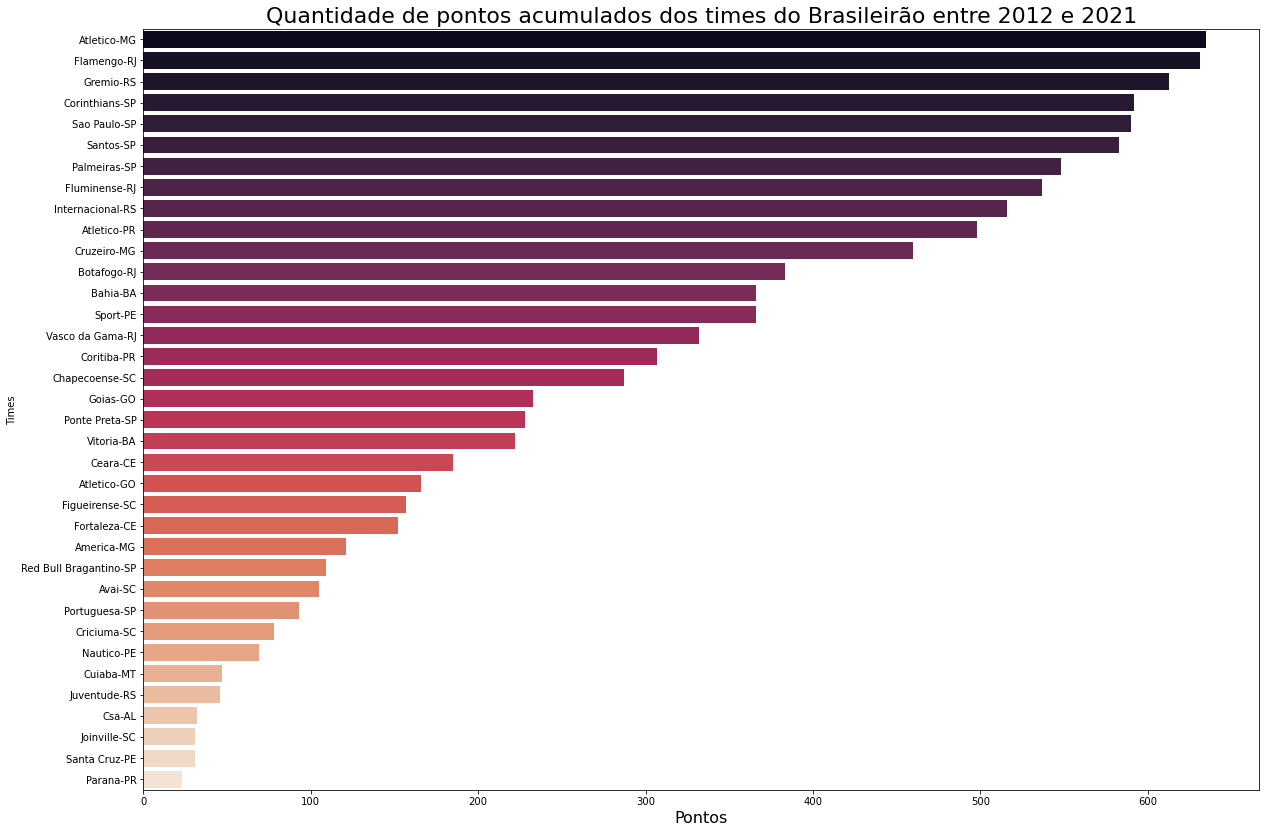

In [39]:
fig, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x=br_times_pts.values, y=br_times_pts.index, palette='rocket')
ax.set_title('Quantidade de pontos acumulados dos times do Brasileirão entre 2012 e 2021', fontsize=22)
ax.set_xlabel('Pontos', fontsize=16)
ax.set_ylabel('Times')
plt.show()

### **Gols**

In [40]:
br_gols_marcados = brasileirao_times['total_gols_marcados'].sort_values(ascending=False)
br_gols_marcados

Atletico-MG               574
Flamengo-RJ               556
Santos-SP                 496
Gremio-RS                 491
Palmeiras-SP              490
Sao Paulo-SP              477
Fluminense-RJ             463
Corinthians-SP            457
Internacional-RS          422
Atletico-PR               418
Cruzeiro-MG               391
Botafogo-RJ               335
Bahia-BA                  328
Sport-PE                  313
Coritiba-PR               282
Vasco da Gama-RJ          280
Chapecoense-SC            261
Vitoria-BA                233
Goias-GO                  212
Ponte Preta-SP            200
Ceara-CE                  161
Atletico-GO               146
Figueirense-SC            142
Fortaleza-CE              128
Red Bull Bragantino-SP    105
America-MG                 94
Portuguesa-SP              89
Avai-SC                    85
Criciuma-SC                77
Nautico-PE                 66
Santa Cruz-PE              45
Juventude-RS               36
Cuiaba-MT                  34
Joinville-

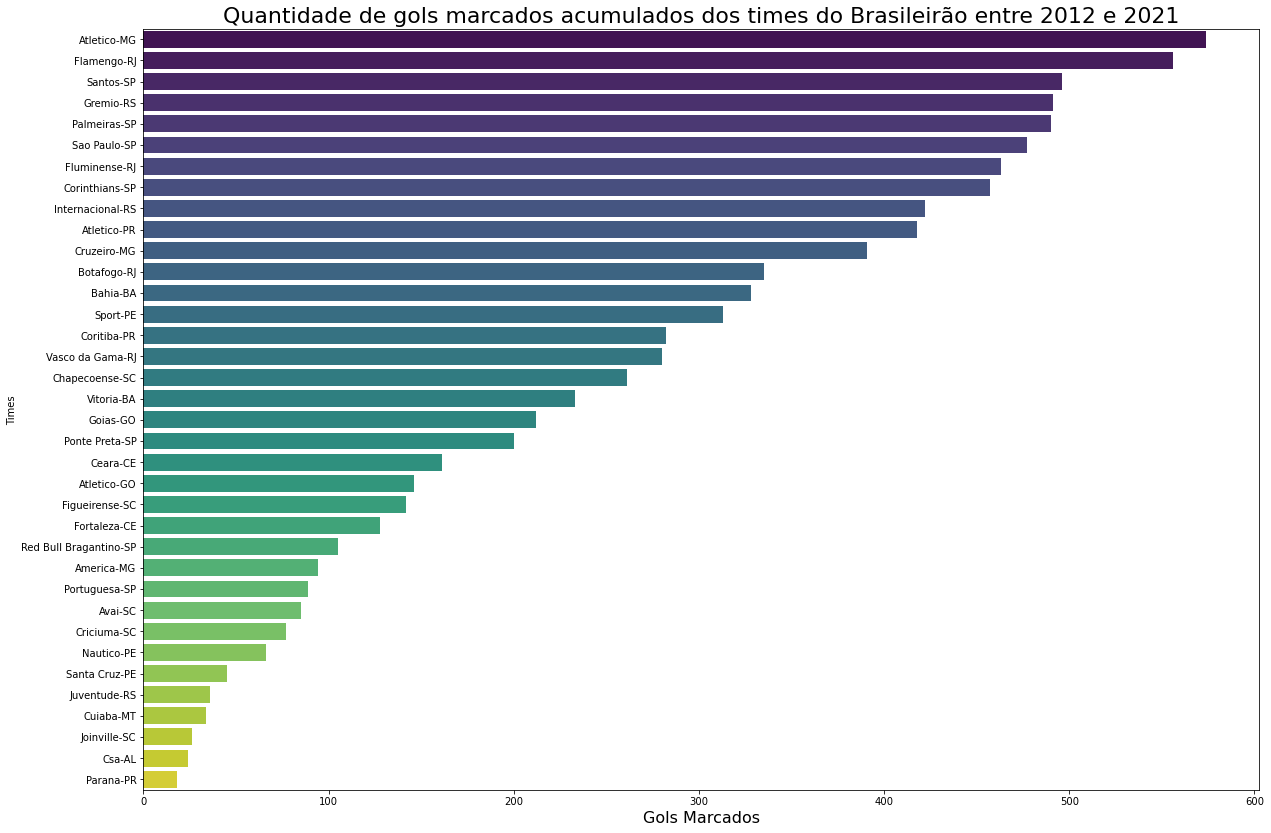

In [41]:
fig, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x=br_gols_marcados.values,y=br_gols_marcados.index, palette = 'viridis')
ax.set_title('Quantidade de gols marcados acumulados dos times do Brasileirão entre 2012 e 2021', fontsize=22)
ax.set_xlabel('Gols Marcados', fontsize=16)
ax.set_ylabel('Times')
plt.show()

In [42]:
br_gols_sofridos = brasileirao_times['total_gols_sofridos'].sort_values(ascending=False)
br_gols_sofridos

Fluminense-RJ             441
Atletico-MG               430
Flamengo-RJ               413
Sport-PE                  397
Sao Paulo-SP              393
Santos-SP                 389
Palmeiras-SP              379
Botafogo-RJ               373
Bahia-BA                  371
Atletico-PR               364
Gremio-RS                 361
Chapecoense-SC            359
Internacional-RS          357
Vasco da Gama-RJ          355
Corinthians-SP            345
Coritiba-PR               339
Cruzeiro-MG               329
Vitoria-BA                281
Goias-GO                  260
Ponte Preta-SP            243
Figueirense-SC            219
Atletico-GO               204
Avai-SC                   170
Ceara-CE                  168
America-MG                142
Fortaleza-CE              138
Nautico-PE                130
Criciuma-SC               119
Portuguesa-SP              87
Red Bull Bragantino-SP     86
Santa Cruz-PE              69
Csa-AL                     58
Parana-PR                  57
Joinville-

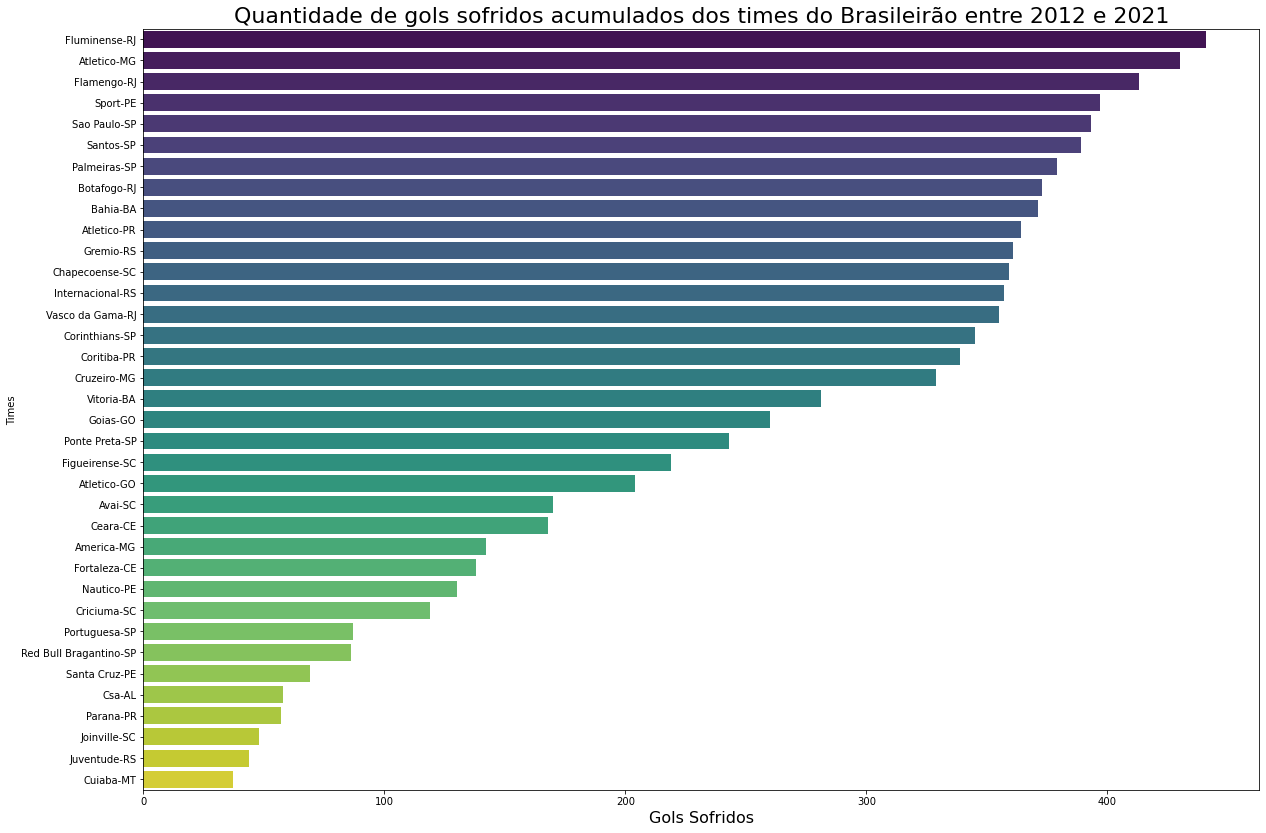

In [43]:
fig, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x=br_gols_sofridos.values,y=br_gols_sofridos.index, palette = 'viridis')
ax.set_title('Quantidade de gols sofridos acumulados dos times do Brasileirão entre 2012 e 2021', fontsize=22)
ax.set_xlabel('Gols Sofridos', fontsize=16)
ax.set_ylabel('Times')
plt.show()

### **Aproveitamentos**

In [44]:
br_aproveitamentos = brasileirao_times['aproveitamento_final_%'].sort_values(ascending=False)
br_aproveitamentos

Atletico-MG               55.85
Flamengo-RJ               55.50
Gremio-RS                 53.77
Palmeiras-SP              53.41
Corinthians-SP            51.93
Sao Paulo-SP              51.75
Santos-SP                 51.14
Cruzeiro-MG               50.44
Internacional-RS          50.29
Atletico-PR               48.54
Red Bull Bragantino-SP    47.81
Fluminense-RJ             47.11
Fortaleza-CE              44.44
Botafogo-RJ               42.00
Vasco da Gama-RJ          41.60
Cuiaba-MT                 41.23
Goias-GO                  40.88
Portuguesa-SP             40.79
Ceara-CE                  40.57
Juventude-RS              40.35
Sport-PE                  40.13
Bahia-BA                  40.13
Ponte Preta-SP            40.00
Vitoria-BA                38.95
Coritiba-PR               38.47
Atletico-GO               36.64
Chapecoense-SC            36.10
America-MG                35.38
Figueirense-SC            34.43
Criciuma-SC               34.21
Avai-SC                   30.70
Nautico-

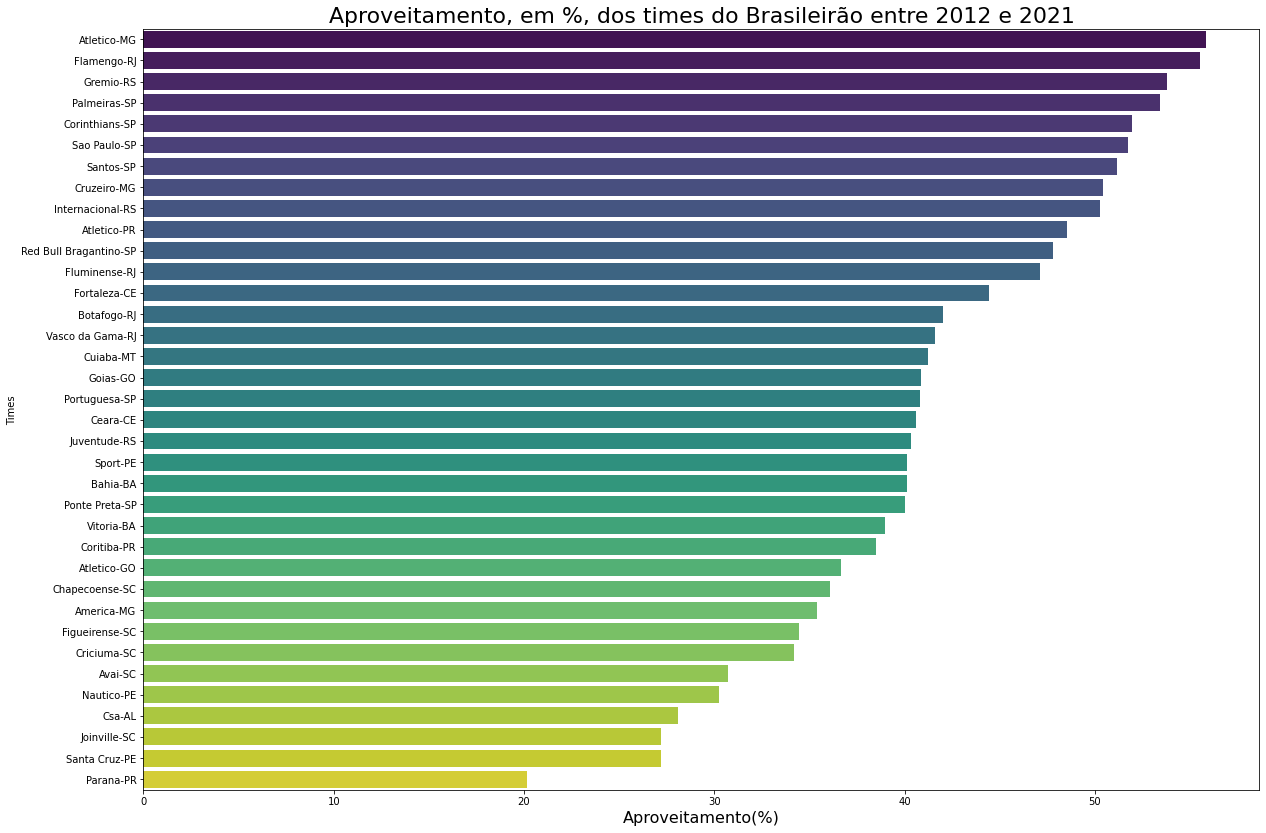

In [45]:
fig, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x=br_aproveitamentos.values,y=br_aproveitamentos.index, palette='viridis')
ax.set_title('Aproveitamento, em %, dos times do Brasileirão entre 2012 e 2021', fontsize=22)
ax.set_xlabel('Aproveitamento(%)', fontsize=16)
ax.set_ylabel('Times')
plt.show()

## **Exportação dos DataFrames**

In [46]:
brasileirao.to_csv('./dados/brasileirao.csv', sep=';', encoding='utf-8', index=False)
brasileirao_times.to_csv('./dados/brasileirao_times.csv', sep=';', encoding='utf-8', index=False)

# **CONCLUSÕES**

- 36 times disputaram o Brasileirão no período entre 2012 e 2021;
- 7 times estiveram presentes em todas as disputas nesse período;
- 6 times estiveram presentes em apenas 1 disputa durante esse período;
- O percentual de vitórias jogando em casa é de 49.05%, dando a entender que o mando de campo influencia significativamente o resultado do jogo;
- O time que mais pontuou foi o Atlético-MG (635) e o que menos pontuou foi o Paraná (23);
- O time que mais marcou gols foi o Atlético-MG (574) e o que mais sofreu foi o Fluminense (441);
- O time com o melhor aproveitamento foi o Atlético-MG (55.85%) e com o menor foi o Paraná (20.18%).